### Importujemy potrzebne biblioteki

In [134]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\mikolaj\Desktop\Studia\2_rok\python\zal\env_zaliczeniowe\Scripts\python.exe -m pip install --upgrade pip


In [3]:
pip install pyarrow

     --------------------------------------- 24.8/24.8 MB 59.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\mikolaj\Desktop\Studia\2_rok\python\zal\env_zaliczeniowe\Scripts\python.exe -m pip install --upgrade pip


In [133]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: C:\Users\mikolaj\Desktop\Studia\2_rok\python\zal\env_zaliczeniowe\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import os
import datetime
from math import fabs, sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import colormaps
import matplotlib.image as mpimg
from analyzer.bus_data import Bus_data as bd

from scrapper.utils.utils import lon_to_km, lat_to_km

Wczytanie danych i obrobienie ich za pomoca modulu Analyzer

In [2]:
data_1 = bd('data_2046__21_2_2024.csv')
data_2 = bd('data_1222__22_2_2024.csv')

## Wizualizacja danych

### Heatmapa przekroczen predkosci w Warszawie

Wymiary Warszawy

In [3]:
north = 52.349191
south = 52.127928
east = 21.2208
west = 20.857758

Usuwamy za niskie predkosci i za wysokie, nierealistyczne predkosci.

In [4]:
too_fast_realistic = data_1.too_fast(50,80)
cropped = bd.crop_coords(too_fast_realistic, north, south, west, east)

too_fast_realistic2 = data_2.too_fast(50,80)
cropped2 = bd.crop_coords(too_fast_realistic2, north, south, west, east)

#### Tworzenie i wypelnianie grida Warszawy:

Na ile dzielimy Warszawe:

In [5]:
intervals_lon = 100
intervals_lat = 100
step_lat = (north - south) / intervals_lat
step_lon = (east - west) / intervals_lon

Tworzenie grida

In [6]:
lon_space = np.linspace(west, east, intervals_lon)
lat_space = np.linspace(south, north, intervals_lat)

In [7]:
lon_axis = pd.Series(lon_space)
lat_axis = pd.Series(lat_space)

Wypelnianie grida:

In [8]:
increased = 0
df_grid = pd.DataFrame(0, index=lat_axis, columns=lon_axis)

for index, row in cropped.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid.index)):
        if row['Lattitude'] > df_grid.index[ind_lat] and row['Lattitude'] < df_grid.index[ind_lat] + step_lat:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid.columns)):
        if row['Longitude'] > df_grid.columns[ind_lon] and row['Longitude'] < df_grid.columns[ind_lon] + step_lon:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 2060 times


In [ ]:
df_al

In [15]:
increased = 0
df_grid2 = pd.DataFrame(0, index=lat_axis, columns=lon_axis)

for index, row in cropped2.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid2.index)):
        if row['Lattitude'] > df_grid2.index[ind_lat] and row['Lattitude'] < df_grid2.index[ind_lat] + step_lat:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid2.columns)):
        if row['Longitude'] > df_grid2.columns[ind_lon] and row['Longitude'] < df_grid2.columns[ind_lon] + step_lon:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid2.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 1270 times


Odwrocenie pionu

In [17]:
correct_north = df_grid.reindex(index=df_grid.index[::-1])
correct_north2 = df_grid2.reindex(index=df_grid.index[::-1])

Customowe opacity

In [20]:
alphas = np.ones(df_grid.shape)

for ind_lat in range(len(df_grid.index)):
    for ind_lon in range(len(df_grid.columns)):
        if(df_grid.iloc[ind_lat, ind_lon] == 0):
            alphas[ind_lat, ind_lon] = 0
        if(df_grid.iloc[ind_lat, ind_lon] == 1):
            alphas[ind_lat, ind_lon] = 0.3
        if(df_grid.iloc[ind_lat, ind_lon] == 2):
            alphas[ind_lat, ind_lon] = 0.4
        if(df_grid.iloc[ind_lat, ind_lon] == 3):
            alphas[ind_lat, ind_lon] = 0.6


In [21]:
alphas2 = np.ones(df_grid2.shape)

for ind_lat in range(len(df_grid2.index)):
    for ind_lon in range(len(df_grid2.columns)):
        if(df_grid2.iloc[ind_lat, ind_lon] == 0):
            alphas2[ind_lat, ind_lon] = 0
        if(df_grid2.iloc[ind_lat, ind_lon] == 1):
            alphas2[ind_lat, ind_lon] = 0.3
        if(df_grid2.iloc[ind_lat, ind_lon] == 2):
            alphas2[ind_lat, ind_lon] = 0.4
        if(df_grid2.iloc[ind_lat, ind_lon] == 3):
            alphas2[ind_lat, ind_lon] = 0.6

#### Ile autobusow w danym miejscu przekraczalo 50 km/h. Pomiar z 21 wieczorem:

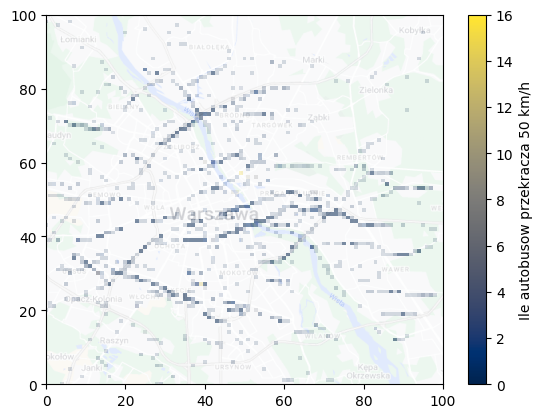

In [22]:
plt.imshow(correct_north, cmap='cividis', aspect='auto', alpha=alphas)
img = plt.imread('wwa_coord_map.png')
plt.colorbar(label='Ile autobusow przekracza 50 km/h')
plt.imshow(img, aspect='auto', extent=[0, len(correct_north.columns), 0, len(correct_north.index)], alpha=0.5)

#### Ile autobusow przekraczalo w danym miejscu 50 km/h. Pomiar z południa.

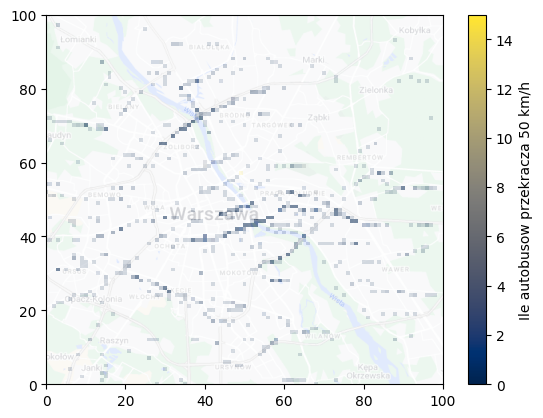

In [25]:
plt.imshow(correct_north2, cmap='cividis', aspect='auto', alpha=alphas2)
img = plt.imread('wwa_coord_map.png')
plt.colorbar(label='Ile autobusow przekracza 50 km/h')
plt.imshow(img, aspect='auto', extent=[0, len(correct_north2.columns), 0, len(correct_north2.index)], alpha=0.5)

#### Heatmapa srodmiescia

Wymiary Śródmiescia

In [27]:
north2 = 52.25116
west2 = 20.98554
east2 = 21.11223
south2 = 52.21882

In [29]:
croppeds = bd.crop_coords(too_fast_realistic, north2, south2, west2, east2)
croppeds2 = bd.crop_coords(too_fast_realistic2, north2, south2, west2, east2)

#### Wypełnianie grida Śródmieścia

In [30]:
intervals_lon2 = 70
intervals_lat2 = 70
step_lat2 = (north2 - south2) / intervals_lat2
step_lon2 = (east2 - west2) / intervals_lon2

In [31]:
lon_space2 = np.linspace(west2, east2, intervals_lon2)
lat_space2 = np.linspace(south2, north2, intervals_lat2)
lon_axis2 = pd.Series(lon_space2)
lat_axis2 = pd.Series(lat_space2)

In [36]:
increased = 0
df_gridS = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in croppeds.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_gridS.index)):
        if row['Lattitude'] > df_gridS.index[ind_lat] and row['Lattitude'] < df_gridS.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_gridS.columns)):
        if row['Longitude'] > df_gridS.columns[ind_lon] and row['Longitude'] < df_gridS.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_gridS.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 429 times


In [37]:
increased = 0
df_gridS2 = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in croppeds2.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_gridS2.index)):
        if row['Lattitude'] > df_gridS2.index[ind_lat] and row['Lattitude'] < df_gridS2.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_gridS2.columns)):
        if row['Longitude'] > df_gridS2.columns[ind_lon] and row['Longitude'] < df_gridS2.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_gridS2.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 328 times


In [44]:
correct_northS = df_gridS
correct_northS2 = df_gridS2

In [42]:
alphasS = np.ones(correct_northS.shape)

for ind_lat in range(len(correct_northS.index)):
    for ind_lon in range(len(correct_northS.columns)):
        if(correct_northS.iloc[ind_lat, ind_lon] == 0):
            alphasS[ind_lat, ind_lon] = 0
        if(correct_northS.iloc[ind_lat, ind_lon] == 1):
            alphasS[ind_lat, ind_lon] = 0.5
        if(correct_northS.iloc[ind_lat, ind_lon] == 2):
            alphasS[ind_lat, ind_lon] = 0.6
        if(correct_northS.iloc[ind_lat, ind_lon] == 3):
            alphasS[ind_lat, ind_lon] = 0.7

In [46]:
alphasS2 = np.ones(correct_northS2.shape)

for ind_lat in range(len(correct_northS2.index)):
    for ind_lon in range(len(correct_northS2.columns)):
        if(correct_northS2.iloc[ind_lat, ind_lon] == 0):
            alphasS2[ind_lat, ind_lon] = 0
        if(correct_northS2.iloc[ind_lat, ind_lon] == 1):
            alphasS2[ind_lat, ind_lon] = 0.5
        if(correct_northS2.iloc[ind_lat, ind_lon] == 2):
            alphasS2[ind_lat, ind_lon] = 0.6
        if(correct_northS2.iloc[ind_lat, ind_lon] == 3):
            alphasS2[ind_lat, ind_lon] = 0.7

Zdjecie srodmiescia jest rozciagniete, zmienimy aspect ratio wykresu zeby nie trzeba bylo zwezac obrazka:

In [47]:
img = mpimg.imread('wwasrodmiescie.png')
height, width, _ = img.shape
aspect_ratio = width / height

#### Gdzie na śródmieściu autobusy przekraczały prędkość o godzinie 21:00?

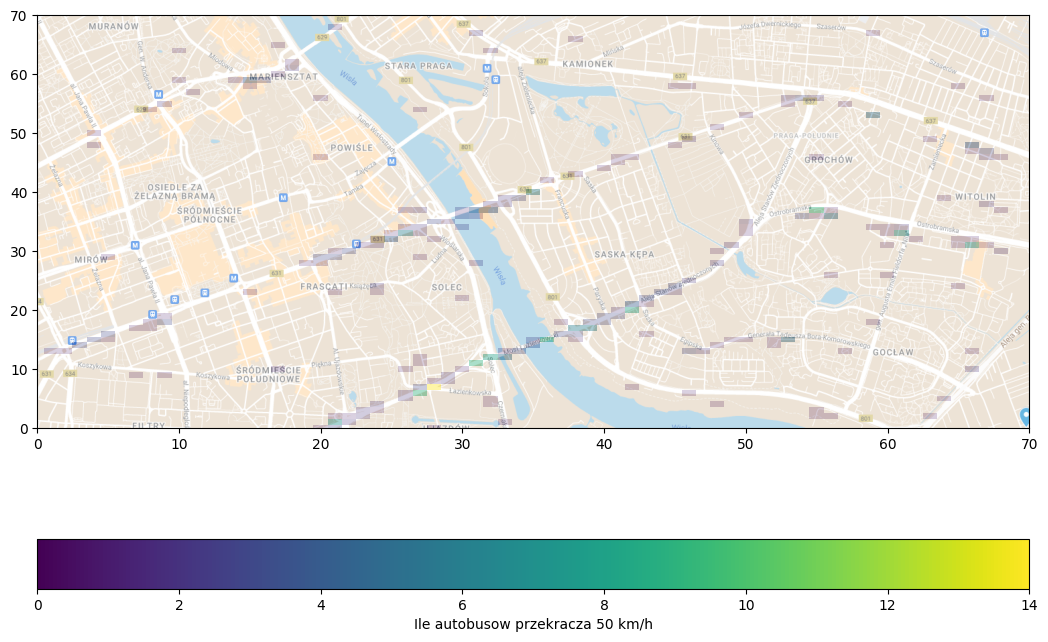

In [49]:
plt.imshow(correct_northS, cmap='viridis', aspect='auto', alpha=alphasS)

img = plt.imread('wwasrodmiescie.png')
plt.colorbar(label='Ile autobusow przekracza 50 km/h', orientation='horizontal')
plt.imshow(img, aspect='auto', extent=[0, len(correct_northS.columns), 0, len(correct_northS.index)], alpha=0.6)
plt.gca().set_aspect(1/aspect_ratio, adjustable='box')
fig_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(fig_size[0] * 2, fig_size[1] * 2)

#### Gdzie na Śródmieściu autobusy przekraczały prędkość o godzinie 12:00?

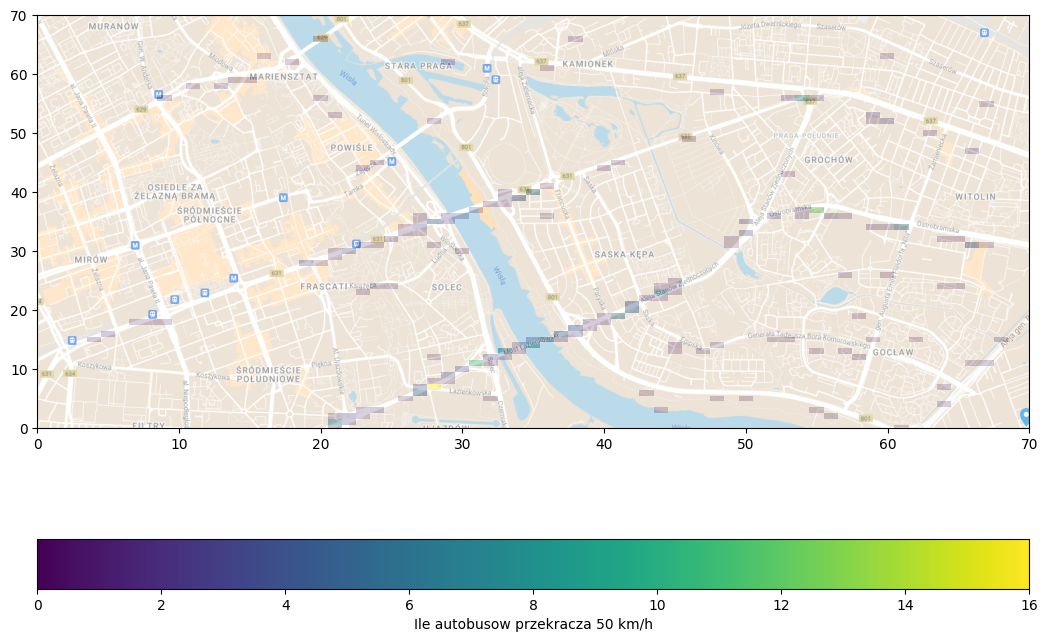

In [50]:
plt.imshow(correct_northS2, cmap='viridis', aspect='auto', alpha=alphasS2)

img = plt.imread('wwasrodmiescie.png')
plt.colorbar(label='Ile autobusow przekracza 50 km/h', orientation='horizontal')
plt.imshow(img, aspect='auto', extent=[0, len(correct_northS2.columns), 0, len(correct_northS2.index)], alpha=0.6)
plt.gca().set_aspect(1/aspect_ratio, adjustable='box')
fig_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(fig_size[0] * 2, fig_size[1] * 2)

### Procent autobusow w danym miejscu, które przekraczają 50 km/h (środek Warszawy).

Wymiary:

In [3]:
north2 = 52.25116
west2 = 20.98554
east2 = 21.11223
south2 = 52.21882

In [52]:
every_realistic_1 = data_1.too_fast(0,80)
every_realistic_2 = data_2.too_fast(0,80)

too_fast_realistic_1 = data_1.too_fast(50,80)
too_fast_realistic_2 = data_2.too_fast(50,80)

every_cropped_1 = bd.crop_coords(every_realistic_1, north2, south2, west2, east2)
too_fast_cropped_1 = bd.crop_coords(too_fast_realistic_1, north2, south2, west2, east2)

every_cropped_2 = bd.crop_coords(every_realistic_2, north2, south2, west2, east2)
too_fast_cropped_2 = bd.crop_coords(too_fast_realistic_2, north2, south2, west2, east2)

Wypelnianie gridow:

In [53]:
intervals_lon2 = 70
intervals_lat2 = 70
step_lat2 = (north2 - south2) / intervals_lat2
step_lon2 = (east2 - west2) / intervals_lon2

In [54]:
lon_space2 = np.linspace(west2, east2, intervals_lon2)
lat_space2 = np.linspace(south2, north2, intervals_lat2)
lon_axis2 = pd.Series(lon_space2)
lat_axis2 = pd.Series(lat_space2)

In [55]:
increased = 0
df_grid_all_1 = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in every_cropped_1.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid_all_1.index)):
        if row['Lattitude'] > df_grid_all_1.index[ind_lat] and row['Lattitude'] < df_grid_all_1.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid_all_1.columns)):
        if row['Longitude'] > df_grid_all_1.columns[ind_lon] and row['Longitude'] < df_grid_all_1.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid_all_1.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        df_grid_all_1.iloc[chosen_lat_ind, chosen_lon_ind] = int(df_grid_all_1.iloc[chosen_lat_ind, chosen_lon_ind])
        increased += 1

print('increased ' + str(increased) + ' times')

increased 7450 times


In [40]:
increased = 0
df_grid_all_2 = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in every_cropped_2.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid_all_2.index)):
        if row['Lattitude'] > df_grid_all_2.index[ind_lat] and row['Lattitude'] < df_grid_all_2.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid_all_2.columns)):
        if row['Longitude'] > df_grid_all_2.columns[ind_lon] and row['Longitude'] < df_grid_all_2.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid_all_2.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        df_grid_all_2.iloc[chosen_lat_ind, chosen_lon_ind] = int(df_grid_all_2.iloc[chosen_lat_ind, chosen_lon_ind])
        increased += 1

print('increased ' + str(increased) + ' times')

increased 7472 times


In [57]:
increased = 0
df_grid_fast_1 = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in too_fast_realistic_1.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid_fast_1.index)):
        if row['Lattitude'] > df_grid_fast_1.index[ind_lat] and row['Lattitude'] < df_grid_fast_1.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid_fast_1.columns)):
        if row['Longitude'] > df_grid_fast_1.columns[ind_lon] and row['Longitude'] < df_grid_fast_1.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid_fast_1.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 2587 times


In [58]:
increased = 0
df_grid_fast_2 = pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for index, row in too_fast_realistic_2.iterrows():
    chosen_lat = -1
    chosen_lon = -1
    
    for ind_lat in range(len(df_grid_fast_2.index)):
        if row['Lattitude'] > df_grid_fast_2.index[ind_lat] and row['Lattitude'] < df_grid_fast_2.index[ind_lat] + step_lat2:
            chosen_lat_ind = ind_lat
            break

    for ind_lon in range(len(df_grid_fast_2.columns)):
        if row['Longitude'] > df_grid_fast_2.columns[ind_lon] and row['Longitude'] < df_grid_fast_2.columns[ind_lon] + step_lon2:
            chosen_lon_ind = ind_lon
            break

    if chosen_lat_ind > -1 and chosen_lon_ind > -1:
        df_grid_fast_2.iloc[chosen_lat_ind, chosen_lon_ind] += 1
        increased += 1

print('increased ' + str(increased) + ' times')

increased 1680 times


In [59]:
type(df_grid_all_1.iloc[0,0])

numpy.int64

In [60]:
type(df_grid_fast_1.iloc[0,0])

numpy.int64

In [61]:
df_percentage_1 =  pd.DataFrame(0, index=lat_axis2, columns=lon_axis2)

for row_ind in range(len(df_grid_fast_1.index)):
    for col_ind in range(len(df_grid_fast_1.columns)):
        value = df_grid_fast_1.iloc[row_ind, col_ind]
        if value > 0:
            denominator = df_grid_all_1.iloc[row_ind, col_ind]
            print(str(value) + "  " + str(denominator))
            df_percentage_1.iloc[row_ind, col_ind] = (value / denominator)

1  3
3  0
2  6
7  15
2  1
2  0
2  2
1  4
1  0
3  0
3  10
1  0
12  11
2  18
1  4
2  1
5  0
2  0
3  0
1  0
4  0
1  0
1  0
4  7
1  4
2  5
1  0
2  1
1  5
2  1
1  0
1  0
1  0
2  0
1  0
4  0
1  0
2  3
1  8
1  0
2  0
3  0
1  0
2  0
1  2
1  0
2  0
2  5
1  5
1  0
2  0
2  0
2  8
2  7
1  9
1  0
1  0
1  0
7  0
1  2
4  1
2  0
1  0
3  0
2  0
1  0
2  3
11  20
3  4
1  0
1  0
2  1
6  1
1  1
1  15
2  0
2  0
1  6
1  1
1  0
2  0
5  0
1  0
3  2
1  0
1  0
1  0
1  0
2  0
5  0
6  12
21  24
2  0
2  0
2  0
1  0
3  0
3  1
1  0
1  0
1  0
3  0
1  0
1  2
1  0
3  1
1  0
2  0
2  0
3  5
4  0
2  0
3  2
3  1
6  4
2  0
1  0
1  117
3  0
2  2
3  1
2  3
5  1
2  0
4  6
1  1
3  8
10  1
1  1
1  0
1  0
3  0
2  1
3  0
3  0
1  1
2  1
5  0
1  0
1  0
5  0
1  0
4  0
3  6
2  1
1  8
1  0
1  1
1  0
1  0
4  7
1  0
1  0
2  4
1  9
4  0
4  0
4  0
2  0
2  4
3  7
2  0
1  0
14  27
1  0
2  0
1  0
1  0
2  1
1  2
4  0
2  0
2  0
1  0
2  0
2  0
3  0
2  0
2  0
1  0
13  12
6  7
2  0
2  0
2  0
1  0
1  0
1  10
1  0
5  3
2  31
1  2
2  0
1  1
1  1
1  3


C:\Users\mikolaj\AppData\Local\Temp\ipykernel_22316\947837104.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_percentage_1.iloc[row_ind, col_ind] = (value / denominator)
C:\Users\mikolaj\AppData\Local\Temp\ipykernel_22316\947837104.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  df_percentage_1.iloc[row_ind, col_ind] = (value / denominator)
C:\Users\mikolaj\AppData\Local\Temp\ipykernel_22316\947837104.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'inf' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_percentage_1.iloc[row_ind, col_ind] = (value / denominator)
C:\Users\mikolaj\AppData\Local\Temp\ipykernel_22316\947837104.py:9: FutureWarning: S

In [27]:
df_grid_all_1.max()

20.985540     6.0
20.987376     5.0
20.989212    31.0
20.991048    12.0
20.992884    16.0
             ... 
21.104886    37.0
21.106722    12.0
21.108558    16.0
21.110394    11.0
21.112230     0.0
Length: 70, dtype: float64